In [64]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame as df

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# Two classes for BinarySVM
classes = [1,6]

# All classes of One-vs-All MultiClass SVM
all_classes = [0,1,2,3,4,5,6,7,8,9]

# Select images from each_classes
each_class=100

sort=False

# MnistDataset to load dataset
class MnistDataset(object):
    def __init__(self, csv_file, classes=classes, each_class=each_class, sort=sort):
        df = pd.read_csv(csv_file)
        raw_data = df.loc[df['label'].isin(classes)]
        if each_class > 0 and sort==True:
            print('Loading Sorted Dataset')
            self.data = raw_data.groupby('label').head(each_class).sort_values(['label'])
        elif each_class > 0 and sort==False:
            print('Loading Random Dataset')
            self.data = raw_data.groupby('label').head(each_class)
        else:
            print('Loading All Random Dataset')
            self.data = raw_data
        self.label = self.data.iloc[:,0]
        self.image = self.data.iloc[:,1:]
        
    def __len__(self):
        return len(self.data)

In [65]:
# Binary SVM class
class BinarySVM(object):
    def __init__(self, classes=classes, each_class=each_class,sort=sort):
        
        print('Loading Training Dataset')
        train_dataset = MnistDataset('../data/train.csv',classes=classes,each_class=each_class,sort=sort)
        
        print('Loading Testing Dataset')
        test_dataset = MnistDataset('../data/test.csv',classes=classes,each_class=each_class)
        
        # Convert dataframe to nd-array
        self.x_train = train_dataset.image.values
        self.y_train = train_dataset.label.values
        self.y_train = np.where(self.y_train == classes[0], 1, -1)
        
        # Add a column in front for bias
        self.x_train = np.c_[np.zeros((self.x_train.shape[0])), self.x_train]
        self.y_train = self.y_train.reshape(self.y_train.shape[0],)

        self.x_test = test_dataset.image.values
        self.y_test = test_dataset.label.values
        self.y_test = np.where(self.y_test == classes[0], 1, -1)
        
        self.x_test = np.c_[np.zeros((self.x_test.shape[0])), self.x_test]
        self.y_test = self.y_test.reshape(self.y_test.shape[0],)
        
        # Dimension of each image
        self.num_of_features = len(self.x_train[0])
        
        # Length of each dataset
        self.num_of_train_data = len(self.x_train)
        self.num_of_test_data = len(self.x_test)
        
        self.w = np.random.rand(1,self.num_of_features)
        
        self.final_acc = 0.0
        self.test_acc = []
        
    # predict accuracy on testing dataset
    def predict(self):
        acc = 0
        score = self.w.dot(self.x_test.transpose())            # calculate score
        final_score = np.where(score > 0, 1, -1)               # predict labels
        acc = np.mean(final_score == self.y_test)              # count correctly predicted labels
        return acc * 100.00                                    # return accuracy percentage
        
    # fit the training data
    def fit(self, C):
#         lambda_ = 2 / (self.num_of_train_data * C)              # initalize regularizer
        self.test_acc = []
        for i in range(1,self.num_of_train_data+1):
            lr = 1 / i                                          # reduce learning rate with iteration
            grad = np.zeros((1,self.num_of_features))           # initialize gradient of weights
            
            for j in range(self.num_of_train_data):
                score = self.y_train[j] * self.w.dot(self.x_train[j])        # calculate the dot product
                if score <= 1:
                    grad = grad + (self.y_train[j] * self.x_train[j])        # update weight gradient
                    
            grad -= (C *  self.w)                       # add regularization term)
            self.w += (lr * grad)                                              # update weights

            acc = self.predict()                                 # test with currect weights
            self.test_acc.append(acc)                            # accumulate all test accuracy of each iteration
            
        return self.w,self.test_acc
    
    # plot the accuracy vs iteration
    def plot(self, acc):
        plt.plot(range(self.num_of_test_data), self.test_acc)
        plt.title('Binary SVM classification Accuracy : {0}%'.format(acc))
        plt.xlabel('iterations')
        plt.ylabel('accuracy')
        plt.tight_layout()
        plt.show()
        

In [61]:
C = [0.001,0.01,0.1,1,10,100]
for i in C:
    # Load dataset
    clf = BinarySVM(each_class=500, classes=classes, sort=False)
    
    # Train
    w, test_acc = clf.fit(C=i)

    # Test
    acc = clf.predict()
    
    print('Binary Classification Accuracy when C:{0} = {1}%'.format(i,acc))

Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:0.001 = 98.1%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:0.01 = 98.1%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:0.1 = 98.5%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:1 = 99.1%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:10 = 99.0%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:100 = 99.3%
Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when

Loading Training Dataset
Loading Random Dataset
Loading Testing Dataset
Loading Random Dataset
Binary Classification Accuracy when C:1 = 99.1%


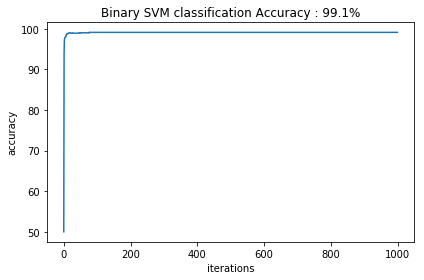

In [67]:
clf = BinarySVM(each_class=500, classes=classes, sort=False)

# Train
w, test_acc = clf.fit(C=1)

# Test
acc = clf.predict()

print('Binary Classification Accuracy when C:{0} = {1}%'.format(1,acc))

# Plot
clf.plot(acc)

Loading Training Dataset
Loading Sorted Dataset
Loading Testing Dataset
Loading Random Dataset


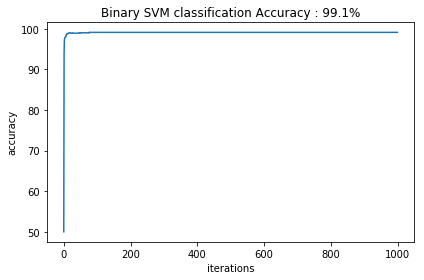

In [66]:
# Load dataset
clf = BinarySVM(each_class=500, classes=classes, sort=True)

# Train
w, test_acc = clf.fit(C=1)

# Test
acc = clf.predict()

# Plot
clf.plot(acc)

In [68]:
# MultiClass SVM
class MultiClassSVM(object):
    def __init__(self, classes=classes, each_class=each_class,sort=False):
        
        train_dataset = MnistDataset('../data/train.csv',classes=all_classes,each_class=each_class,sort=sort)
        test_dataset = MnistDataset('../data/test.csv',classes=all_classes,each_class=each_class)
        
        
        # Convert dataframe to nd-array
        self.x_train = train_dataset.image.values
        self.x_train = np.c_[np.zeros((self.x_train.shape[0])), self.x_train]
        
        self.y_train = train_dataset.label.values
        self.y_train_all_labels =[]
        
        for i in all_classes:
            self.y_train_labels = np.where(self.y_train == all_classes[i], 1, -1)
            self.y_train_all_labels.append(self.y_train_labels)

        self.x_test = test_dataset.image.values
        self.x_test = np.c_[np.zeros((self.x_test.shape[0])), self.x_test]
        
        self.y_test = test_dataset.label.values
        self.y_test_all_labels = []
        
        for i in all_classes:
            self.y_test_labels = np.where(self.y_test == all_classes[i], 1, -1)
            self.y_test_all_labels.append(self.y_test_labels)
        
        # Dimension of each image
        self.num_of_features = len(self.x_train[0])
        
        # Length of each dataset
        self.num_of_train_data = len(self.x_train)
        self.num_of_test_data = len(self.x_test)
        
        self.total_w = []
        self.w = np.random.rand(1,self.num_of_features)
        
        self.final_acc = 0.0
        self.test_acc = []
        self.total_each_acc = []  
        
    # predict accuracy on testing dataset
    def predict(self, input_w, each_class):
        acc = 0
        score = input_w.dot(self.x_test.transpose())
        final_score = np.where(score > 0, 1, -1)
        acc = np.mean(final_score == self.y_test_all_labels[each_class])
        return acc * 100.00
        
    # fit the training data
    def fit(self, each_class, C):
        self.w = np.random.rand(1,self.num_of_features)         # initialize weights
#         lambda_ = 2 / (self.num_of_train_data * C)              # initalize regularizer
        for i in range(1,self.num_of_train_data+1):
            lr = 1 / i                                          # learning rate
            grad = np.zeros((1,self.num_of_features))           #initialize gradient of weights
            
            for j in range(self.num_of_train_data):
                score = self.y_train_all_labels[each_class][j] * self.w.dot(self.x_train[j])  # calculate the dot product
                if score <= 1:
                    grad = grad + (self.y_train_all_labels[each_class][j] * self.x_train[j])  # update weight gradient
                    
            grad -= C *  self.w                                                         # add regularization term
            self.w += lr * grad                                 # update weights
        return self.w
    
    # test
    # prints accuracy of each class
    def test(self, final_w):
        for i in range(len(self.y_test_all_labels)):
            acc = multi_clf.predict(final_w[i], i)
            print('Testing accuracy for class {} = {:.2f}%'.format(i, acc))  
    
    # plot the accuracy vs iteration
    def plot(self, acc):
        plt.plot(range(self.num_of_test_data), self.test_acc)
        plt.title('Binary SVM classification Accuracy : {0}%'.format(acc))
        plt.xlabel('iterations')
        plt.ylabel('accuracy')
        plt.tight_layout()
        plt.show()
       
    # fits all class training data by calling binary fit
    # returns weights after training from each class
    def multiFit(self, C):
        for i in all_classes:
            print('Training for class ',i)
            eachW = self.fit(i, C)
            self.total_w.append(eachW)
        return self.total_w
    
    # Create confusion matrix
    def confusion_matrix(self, final_w):
        con_mat = np.zeros((len(final_w),len(final_w)))
        for i in range(len(final_w)):
            score = np.zeros((self.num_of_test_data))
            for j in range(self.num_of_test_data):
                y = final_w[i].dot(self.x_test[j].transpose())       # calculates score of each image from each SVM
                score[j] = y                                         # appends score
                index = np.argmax(score)                             # take index of highest score
                con_mat[i][self.y_test[index]] += 1                  # increase points when pred_class = ground_class

        return con_mat/1000                                          # normalize matrix to 1
    
    def avg_prec(self, con_mat, final_w):
        avg = 0.0
        for i in range(len(final_w)):
            avg += con_mat[i][i]
        return avg/10
    
    def visualization(self, final_w):
        min_indices = []
        for i in range(len(final_w)):
            result_y = final_w[i].dot(self.x_test.transpose())
            min_index = np.argmin(result_y)
            min_indices.append(min_index)
            
        plt.rcParams.update({'font.size': 30})
        fig=plt.figure(figsize=(50,50))
        fig.tight_layout(h_pad=2.0)
        columns = 3
        rows = 5
        for i, index in enumerate(min_indices):
#             plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=3.0)
            img = np.delete(self.x_test[index],0)
            reshaped_img = img.reshape(28,28)
            gt_class = self.y_test[index]
            fig.add_subplot(rows, columns, i+1)
            plt.title('GT Label : {0} \nPredicted Label : {1}'.format(gt_class, i))
            plt.imshow(reshaped_img)

In [69]:
# Load dataset
multi_clf = MultiClassSVM(classes=all_classes, sort=False)

Loading Random Dataset
Loading Random Dataset


In [51]:
# Train One-vs-All
final_w = multi_clf.multiFit(C=1)

Training for class  0
Training for class  1
Training for class  2
Training for class  3
Training for class  4
Training for class  5
Training for class  6
Training for class  7
Training for class  8
Training for class  9


In [52]:
multi_clf.test(final_w)

Testing accuracy for class 0 = 98.10%
Testing accuracy for class 1 = 98.00%
Testing accuracy for class 2 = 96.70%
Testing accuracy for class 3 = 95.40%
Testing accuracy for class 4 = 97.20%
Testing accuracy for class 5 = 93.20%
Testing accuracy for class 6 = 96.70%
Testing accuracy for class 7 = 96.30%
Testing accuracy for class 8 = 87.20%
Testing accuracy for class 9 = 92.60%


In [70]:
# con_mat = confusion_matrix(multi_clf.x_test, multi_clf.y_test, final_w)
con_mat = multi_clf.confusion_matrix(final_w)

print(con_mat)

[[ 0.998  0.001  0.001  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.999  0.001  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.003  0.003  0.001  0.97   0.002  0.002  0.001  0.014  0.     0.004]
 [ 0.001  0.001  0.001  0.     0.997  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.015  0.     0.     0.985  0.     0.     0.     0.   ]
 [ 0.003  0.003  0.001  0.001  0.003  0.002  0.981  0.001  0.     0.005]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.   ]
 [ 0.001  0.002  0.001  0.     0.057  0.331  0.     0.     0.608  0.   ]
 [ 0.001  0.002  0.001  0.     0.002  0.     0.     0.     0.     0.994]]


In [71]:
print('Average precision :',multi_clf.avg_prec(con_mat, final_w))

Average precision : 0.9532


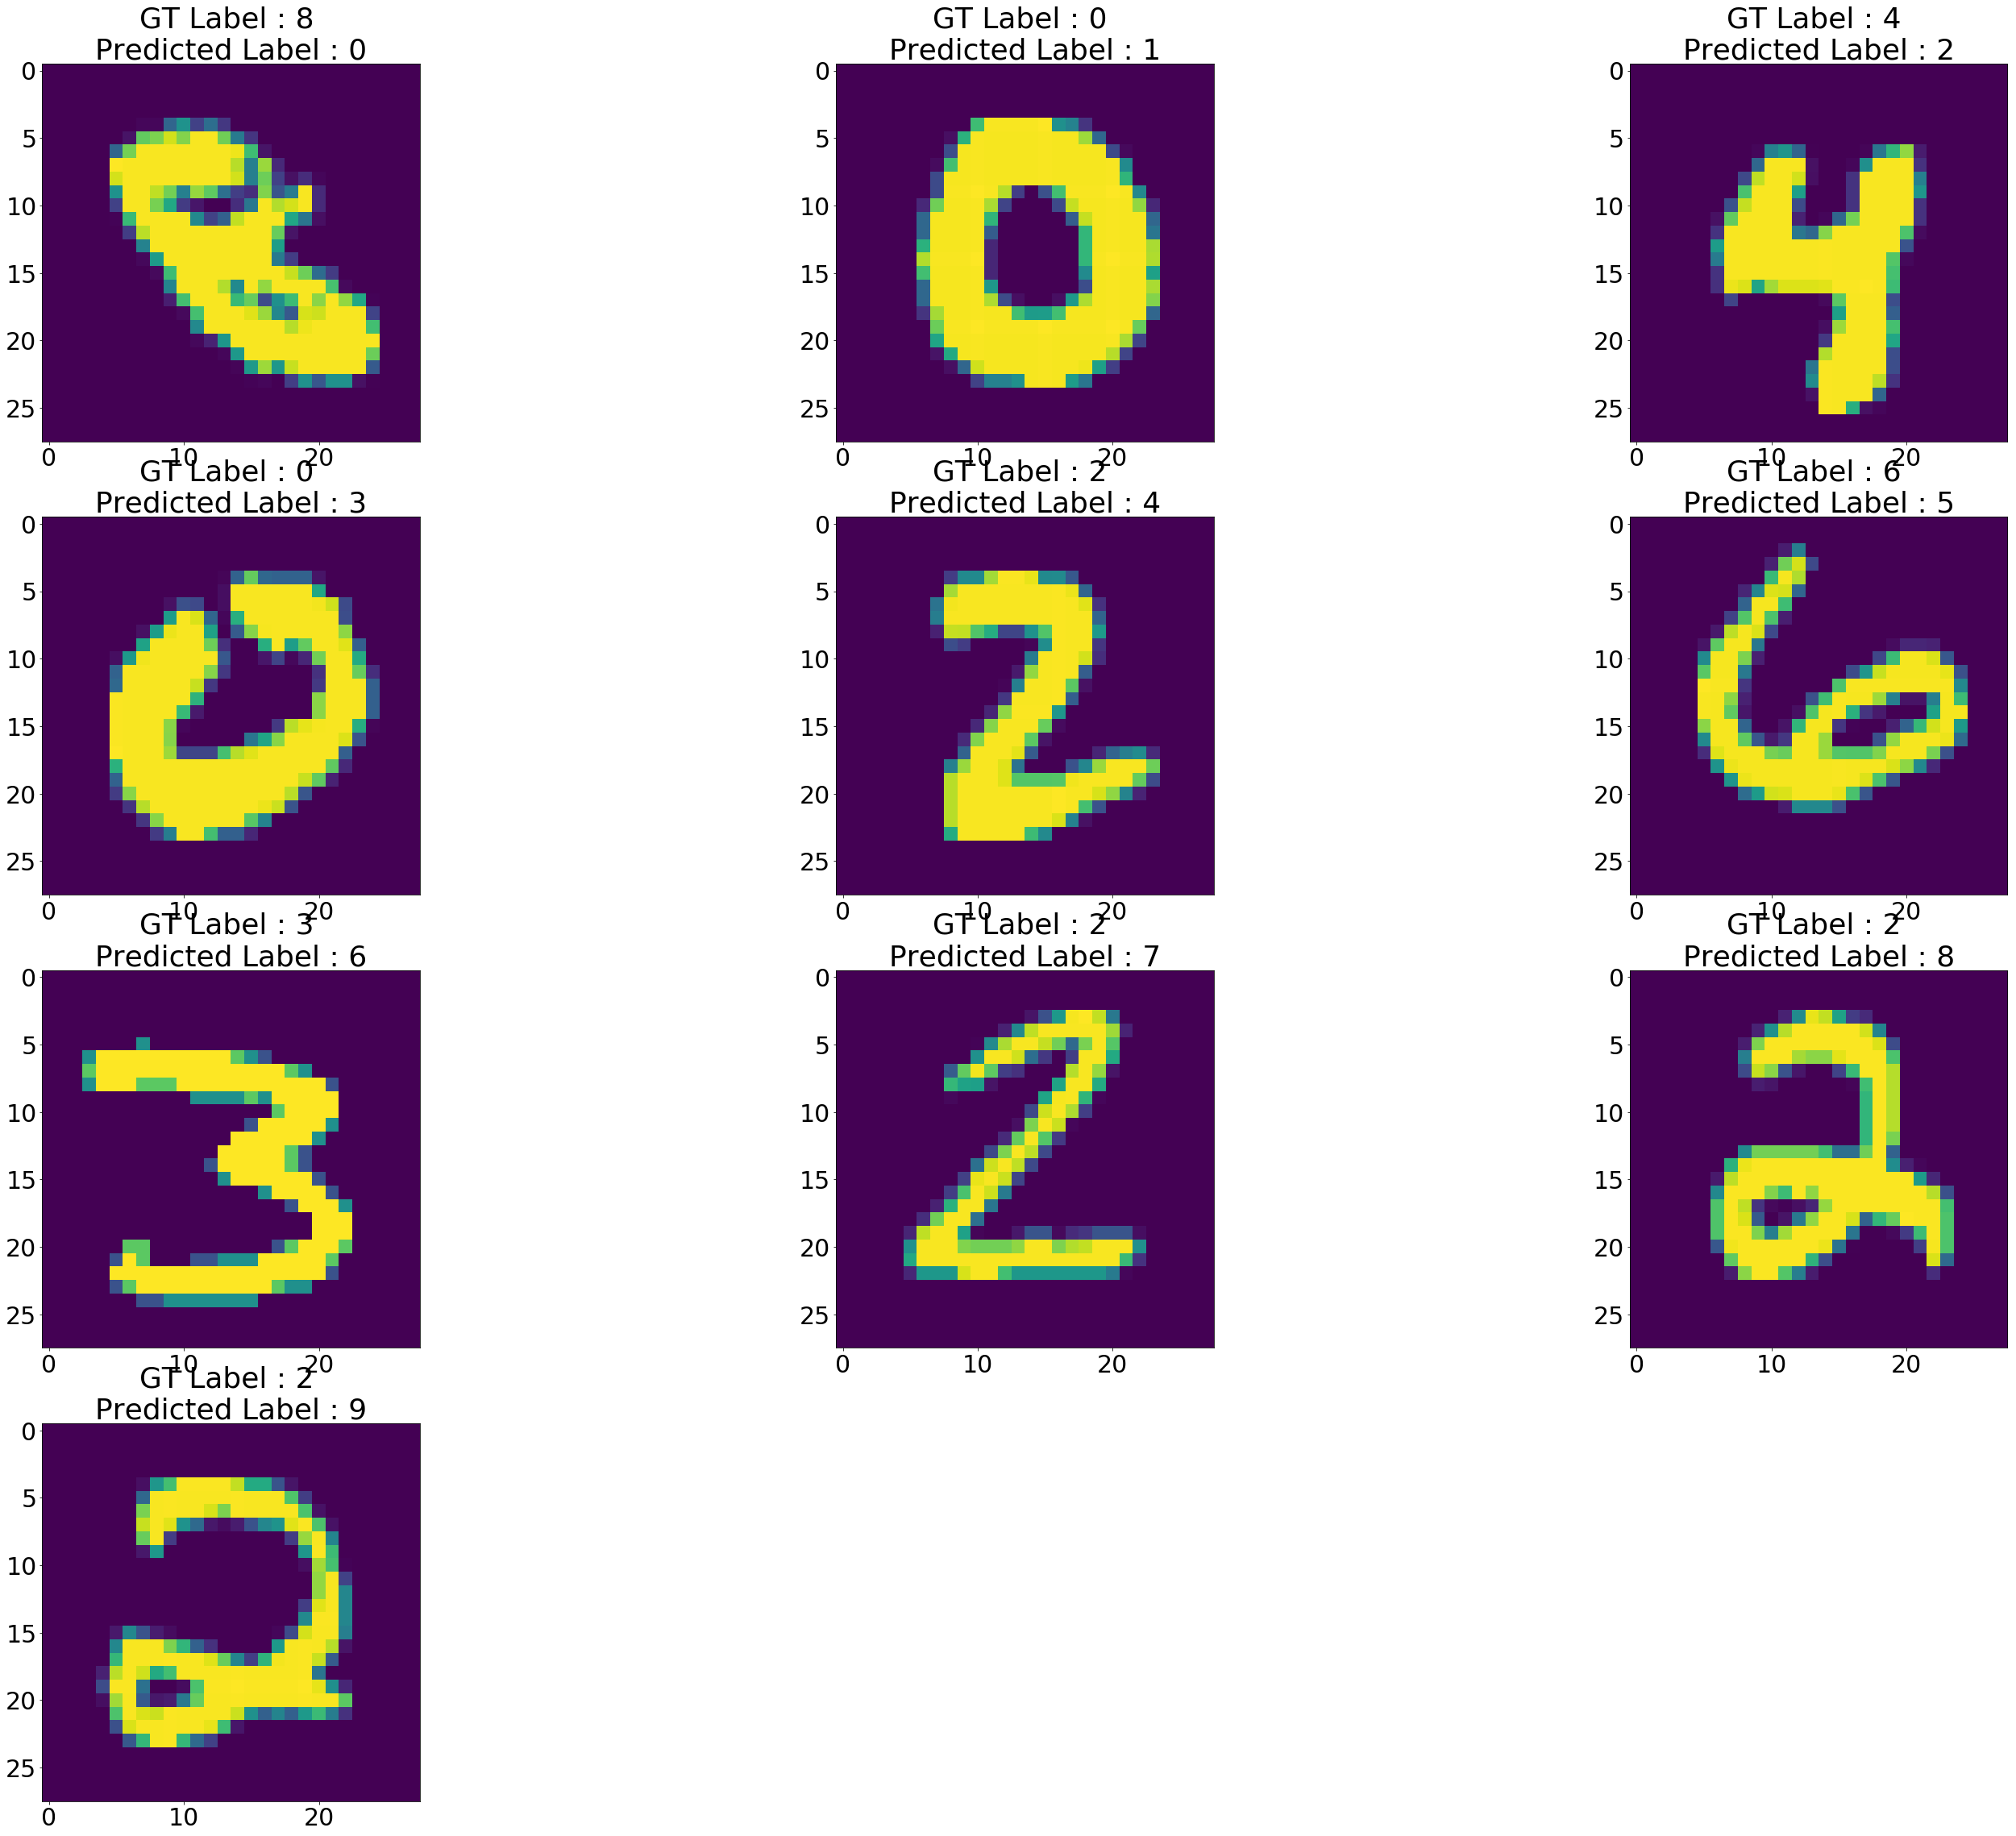

In [55]:
multi_clf.visualization(final_w)